# ShockWave

Analyze USGS earthqake data from 1970 to 2020. This equates to a total of X million earthquakes, Y million are magnitude 3 or greater. 

## ShockWave team members: 

  * John Burke
  * Ali Chunawala
  * Anderson Igben
  * Stanislav Kuzmin
  * Henry Wycislo

## Analize earthquake data

* Plot the earthquake locations
* Plot magnitudes of the earthquakes
* Show the magnitudes compared to the location
* Show collation of earthquakes around the ring of fire

## Questions to answer

* Has there been an increase of earthquakes greater than magnitude 3 since 1970?
* Is there an increase of the magnitude of earthquakes since 1970? 

# Note to project team members

* We have cleaned up the data and have shrunk the file by using a zip file and by removing columns that we don't need. The data is sotored in the data folder in our git hub repository. 

* To work with this notebook - follow these steps:

1. copy the shockwave.ipynb file to your folder in git

2. cd to your folder in git from the command line and start your Jupiter notebook in your folder. 

   a. With any luck, you should be able to access the data without any issue.

   b. After you get your part done, let HenryW know and I will merge your changes into the 'main' notebook for our project

## Agenda for 8/29/2021 @ 8:00 pm

1. Make sure Anderson and Ali can access the data
2. Anderson and Ali will be presenters


# THANKS FOR BEING AWESOME EVERYBODY

### need to find the graphs to prove our hypothisis 


   

   

   

In [49]:
import os
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import requests
from pprint import pprint
import gmaps
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
import requests

# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
google_api_key = os.getenv("google_api_key")
#type(google_api_key)
gmaps.configure(api_key=google_api_key)


In [50]:
# one month of test data 
# url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2021-01-01&endtime=2021-01-31'
# tables = pd.read_csv(url)

# quake_df = pd.DataFrame(tables)
# quake_df.head()



In [51]:
# There are a few months that had more than 20k earthquakes
# Made new list to do half months

# date_list = pd.date_range('1970-01-01','2021-08-01', 
#               freq='MS').strftime("%Y-%m-%d").tolist()

# use Semi Month frequency 15th and the last
#months = pd.date_range('1969-12-31','2021-08-01',freq='SM').strftime("%Y-%m-%d")
# moving to weekly - 2019-06-30 had over 20k earthquakes!! 
# pd.date_range('1969-12-01','2021-08-01', freq='SM').strftime("%Y-%m-%d").tolist()
date_list = pd.date_range('1969-12-01','2021-08-01', 
              freq='W').strftime("%Y-%m-%d").tolist()

len(date_list)

2696

In [52]:
# read date list, create copy of csv and load to tables series
# tables = []
# for x in range(len(date_list)-1):
#     start = date_list[x]
#     end = date_list[x+1]
#     url = f'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime={start}&endtime={end}'
#     print(url)
#     df1 = pd.read_csv(url)
#     df1.to_csv(f"data/{start}_{end}.csv")
#     tables.append(df1)

In [53]:
# df = pd.concat(tables)
# # save all data to csv
# df.to_csv("data/all_earthquake_data.csv")
# df.head()

In [54]:
# this loads all of the earthquake data 
quake_df = pd.read_csv("../data/all_earthquake_data2.zip")
quake_df['year'] = pd.DatetimeIndex(quake_df['time']).year
quake_df

,time,latitude,longitude,mag,place,year
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii",1969
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington",1969
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii",1969
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii",1969
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii",1969
...,...,...,...,...,...,...
4053076,2021-07-25T00:14:10.316Z,62.637400,-150.151200,1.30,"21 km N of Chase, Alaska",2021
4053077,2021-07-25T00:05:08.190Z,19.228500,-155.453659,1.84,"3 km NE of P?hala, Hawaii",2021
4053078,2021-07-25T00:03:53.992Z,11.217900,-86.871700,4.50,"74 km SSW of Masachapa, Nicaragua",2021
4053079,2021-07-25T00:02:53.559Z,60.157700,-141.588500,1.10,"124 km WNW of Yakutat, Alaska",2021


In [55]:
# Store latitude and longitude in locations
quake_df['year'] = pd.DatetimeIndex(quake_df['time']).year
locations = quake_df[["latitude", "longitude"]]
magnitude  = quake_df[['mag']].astype(float)
quake_df['decade'] = quake_df['year'].apply(lambda x: str(x) [:3] + '0s')
quake_df

,time,latitude,longitude,mag,place,year,decade
0,1969-12-13T18:59:11.430Z,19.313000,-155.104000,2.78,"17 km S of Fern Forest, Hawaii",1969,1960s
1,1969-12-13T17:55:57.400Z,46.709000,-119.234333,1.60,"13 km SSW of Othello, Washington",1969,1960s
2,1969-12-13T13:03:04.570Z,19.466667,-155.487667,1.94,"26 km W of Volcano, Hawaii",1969,1960s
3,1969-12-13T12:53:50.580Z,19.443167,-155.248833,NaN,"1 km W of Volcano, Hawaii",1969,1960s
4,1969-12-13T10:43:38.000Z,19.304167,-155.210500,2.51,"15 km S of Volcano, Hawaii",1969,1960s
...,...,...,...,...,...,...,...
4053076,2021-07-25T00:14:10.316Z,62.637400,-150.151200,1.30,"21 km N of Chase, Alaska",2021,2020s
4053077,2021-07-25T00:05:08.190Z,19.228500,-155.453659,1.84,"3 km NE of P?hala, Hawaii",2021,2020s
4053078,2021-07-25T00:03:53.992Z,11.217900,-86.871700,4.50,"74 km SSW of Masachapa, Nicaragua",2021,2020s
4053079,2021-07-25T00:02:53.559Z,60.157700,-141.588500,1.10,"124 km WNW of Yakutat, Alaska",2021,2020s


In [56]:
seventies = quake_df.loc[(quake_df['decade'] == '1970s') & (quake_df['mag'] >= 3)]
num_of_quakes_70 = seventies['decade'].value_counts()
eighties = quake_df.loc[(quake_df['decade'] == '1980s') & (quake_df['mag'] >= 3)]
num_of_quakes_80 = eighties['decade'].value_counts()
nineties = quake_df.loc[(quake_df['decade'] == '1990s') & (quake_df['mag'] >= 3)]
num_of_quakes_90 = nineties['decade'].value_counts()
y2k = quake_df.loc[(quake_df['decade'] == '2000s') & (quake_df['mag'] >= 3)]
num_of_quakes_00 = y2k['decade'].value_counts()
y2k1 = quake_df.loc[(quake_df['decade'] == '2010s') & (quake_df['mag'] >= 3)]
num_of_quakes_10 = y2k1['decade'].value_counts()
y2k2 = quake_df.loc[(quake_df['year'] == 2020) & (quake_df['mag'] >= 3)]
print(f'Total Number to Earthquakes in {num_of_quakes_70}')
print(f'Total Number to Earthquakes in {num_of_quakes_80}')
print(f'Total Number to Earthquakes in {num_of_quakes_90}')
print(f'Total Number to Earthquakes in {num_of_quakes_00}')
print(f'Total Number to Earthquakes in {num_of_quakes_10}')

Total Number to Earthquakes in 1970s    40968
Name: decade, dtype: int64
Total Number to Earthquakes in 1980s    75568
Name: decade, dtype: int64
Total Number to Earthquakes in 1990s    125440
Name: decade, dtype: int64
Total Number to Earthquakes in 2000s    199869
Name: decade, dtype: int64
Total Number to Earthquakes in 2010s    187015
Name: decade, dtype: int64


In [57]:
top10_quakes_all = quake_df.nlargest(10, 'mag')
top10_70s = seventies.nlargest(10, 'mag')
top10_80s = eighties.nlargest(10, 'mag')
top10_90s = nineties.nlargest(10, 'mag')
top10_00s = y2k.nlargest(10, 'mag')
top10_10s = y2k1.nlargest(10, 'mag')

In [58]:
# Google maps plot
locations = top10_quakes_all[['latitude', 'longitude']]
weights = top10_quakes_all['mag']

fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])



# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights,
                                 dissipating=False, max_intensity=10,
                                 point_radius=3)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [59]:
marker_locations = top10_quakes_all[['latitude', 'longitude']]

fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
# Plot Heatmap - careful might get expensive
# fig = gmaps.figure(zoom_level=2, center=[31.9686, -99.9018])

# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights = quake_df['mag'] > 3,
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig

In [61]:
mag


1862053    9.1
2546764    9.1
2416376    8.8
1890830    8.6
2669134    8.6
1493118    8.4
2149271    8.4
93691      8.3
1007547    8.3
2069722    8.3
Name: mag, dtype: float64

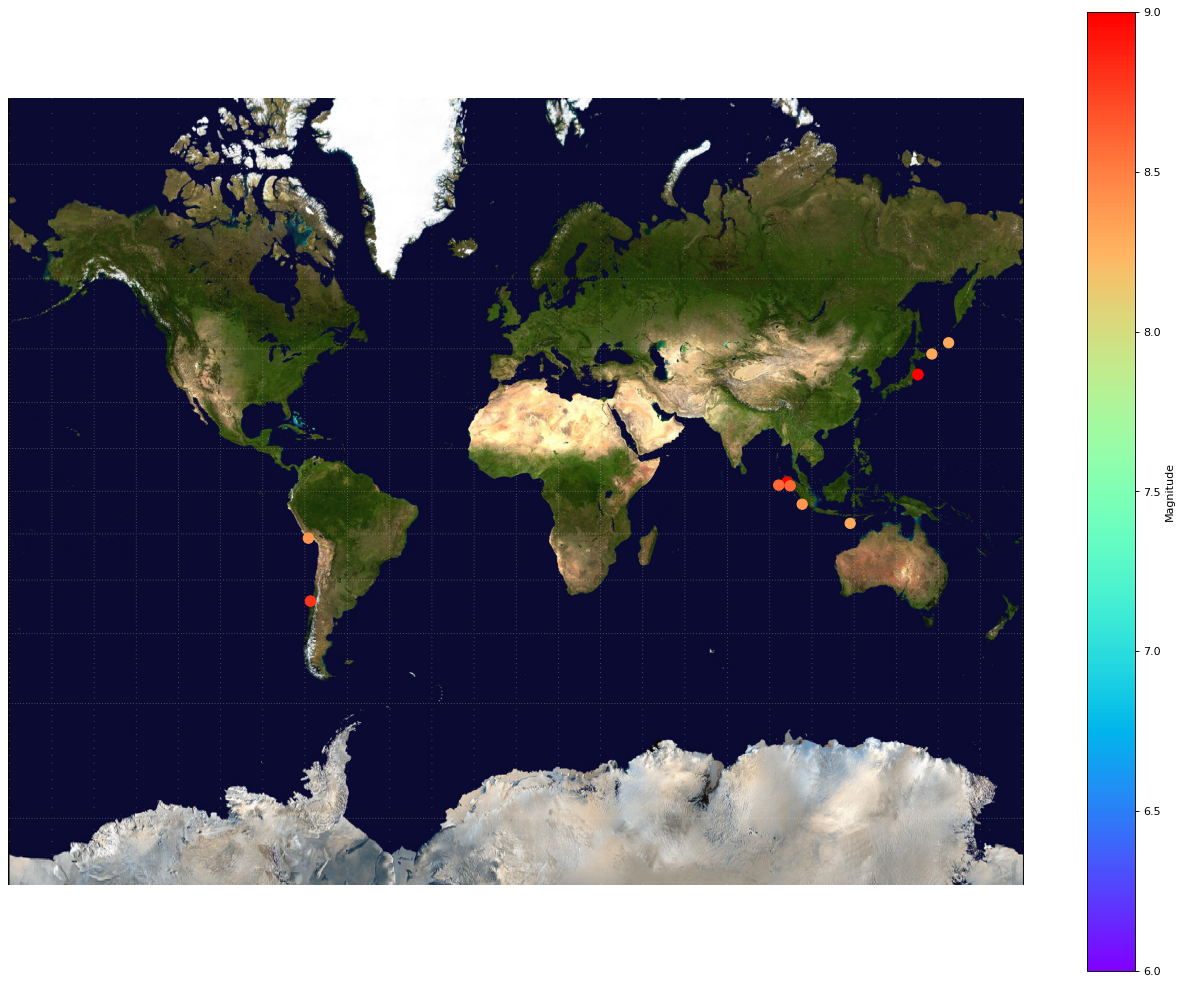

In [70]:
# Stan's cool idea - plot the USGS data on a picture instead of google maps. 
# https://medium.com/@suverov.dmitriy/how-to-convert-latitude-and-longitude-coordinates-into-pixel-offsets-8461093cb9f5

def latLonToOffsets(latitude, longitude, mapWidth, mapHeight):
    
    FE = 180
    radius = mapWidth / (2 * np.pi)
    latRad = np.array(latitude)/180*np.pi
    lonRad = (np.array(longitude) + FE)/180*np.pi
    x = lonRad * radius;
    yFromEquator = radius * np.log(np.tan(np.pi / 4 + latRad / 2))
    y = mapHeight / 2 - yFromEquator
    
    return [x, y]
    

#from mpl_toolkits.axes_grid1 import make_axes_locatable

#latitudeNY = 41.145556
#longitudeNY = -73.995

#latitudeML = -37.867579
#longitudeML = 145.048621

img = mpimg.imread('../stan/Mercator_projection.jpg')

mapWidth=len(img[0])
mapHeight=len(img)

#ncoords=latLonToOffsets([latitudeNY,latitudeML], [longitudeNY,longitudeML], mapWidth, mapHeight)
xcoords=top10_quakes_all['latitude'] 
ycoords=top10_quakes_all['longitude']
mag=top10_quakes_all['mag']

ncoords=latLonToOffsets(xcoords, ycoords, mapWidth, mapHeight)
cmp = cm.rainbow

plt.figure(figsize=(mapWidth/100, mapHeight/100), dpi=80)
ax = plt.gca()
plt.imshow(img)
plt.axis('off')
plt.scatter(ncoords[0],ncoords[1],s=mag*10, c=mag,  marker='o',cmap=cmp, vmin=6,vmax=9)
plt.colorbar().set_label('Magnitude')
plt.show()



In [63]:
pwd


'/Users/henrywycislo/DataClass/shockwave/henry'

In [64]:
# set all NaN to 0 
# query > 3 mag 
# limit latitued to +/ - 85 degrees
